# Project Implementation-02
This notebook contains Activities 4 to 7 from the Project Implementation 02

**Student** Gazali Bin Ahmad   
**Date:** 7th July 2025
Online notebook link: [Project Implementation 02](https://colab.research.google.com/drive/1qh0aOm-HNbFoU_ltxMSG5LhV0cYhkX5e?usp=sharing)

### Import Libraries and Load Data

In [1]:
libraries = {
    "pandas": "pd",
    "numpy": "np",
    "matplotlib.pyplot": "plt",
    "matplotlib.ticker": "mticker",
    "seaborn": "sns",
    "requests": "requests",
}

for lib, alias in libraries.items():
    try:
        exec(f"import {lib} as {alias}")
        print(f"✅ {lib} imported successfully as {alias}")
    except ImportError as e:
        print(f"❌ Failed to import {lib}: {e}")


✅ pandas imported successfully as pd
✅ numpy imported successfully as np
✅ matplotlib.pyplot imported successfully as plt
✅ matplotlib.ticker imported successfully as mticker
✅ seaborn imported successfully as sns
✅ requests imported successfully as requests


In [2]:
# Importing the csv file from the provided URL
# Imported CSV file is too big, using chunking to prevent timeout issues
# Importing necessary libraries

url = "https://lms.educlaas.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EDUCLaSS+PYD+PDDS-PYD-0425-24Jun2025E+type@asset+block/owid-covid-data.csv"
filename = "owid-covid-data.csv"

# Stream download in chunks
with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

# Setting display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats to 2 decimal places


df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])


## Activity 4: Regional Analysis

### Create a grouped bar chart to visualize new cases by continent and month.

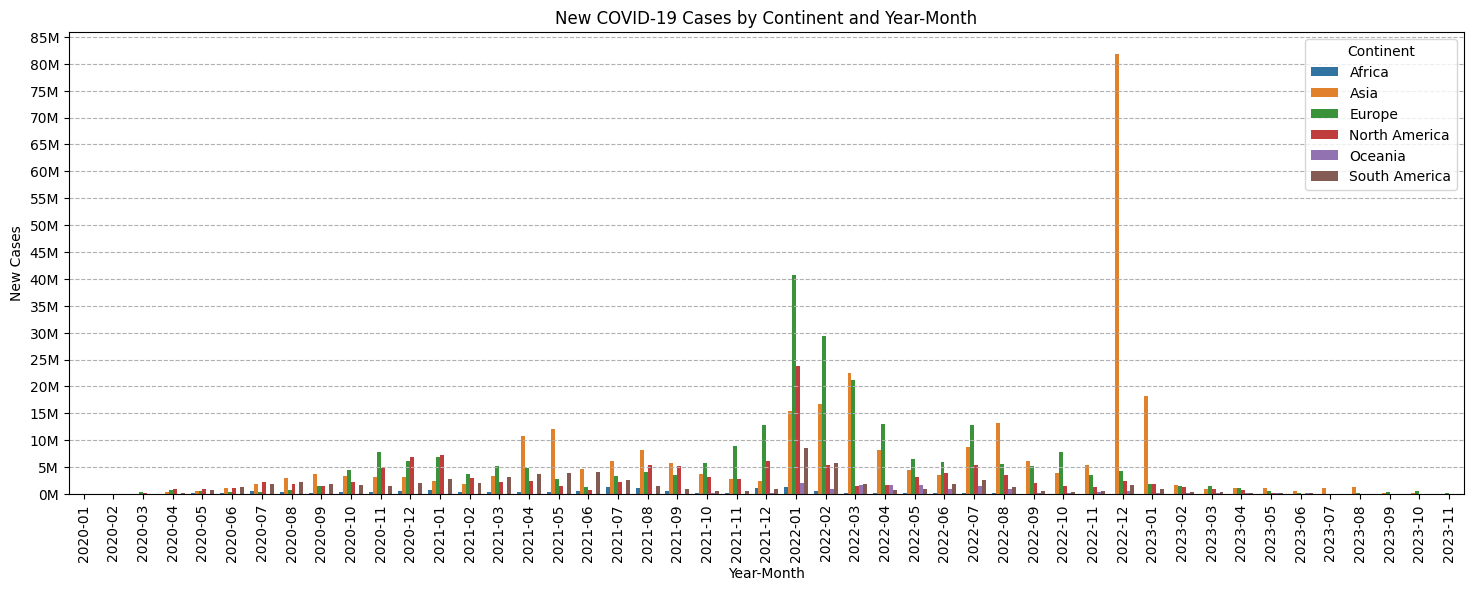

In [3]:
# 4.1 Grouped bar chart: New cases by continent and month across the dataset

# Prepare data
df['year_month'] = df['date'].dt.strftime('%Y-%m')
grouped = df.groupby(['continent', 'year_month'])['new_cases'].sum().reset_index()

plt.figure(figsize=(18, 6))
ax = sns.barplot(data=grouped, x='year_month', y='new_cases', hue='continent', errorbar=None)
plt.title('New COVID-19 Cases by Continent and Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('New Cases')
plt.legend(title='Continent')
plt.xticks(rotation=90)

# Format y-axis in millions and add gridlines
ax.yaxis.set_major_locator(mticker.MultipleLocator(5_000_000))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))
ax.yaxis.grid(True, linestyle='--', which='major')

plt.show()



### Visualize the distribution of total COVID-19 cases by year using a box plot.

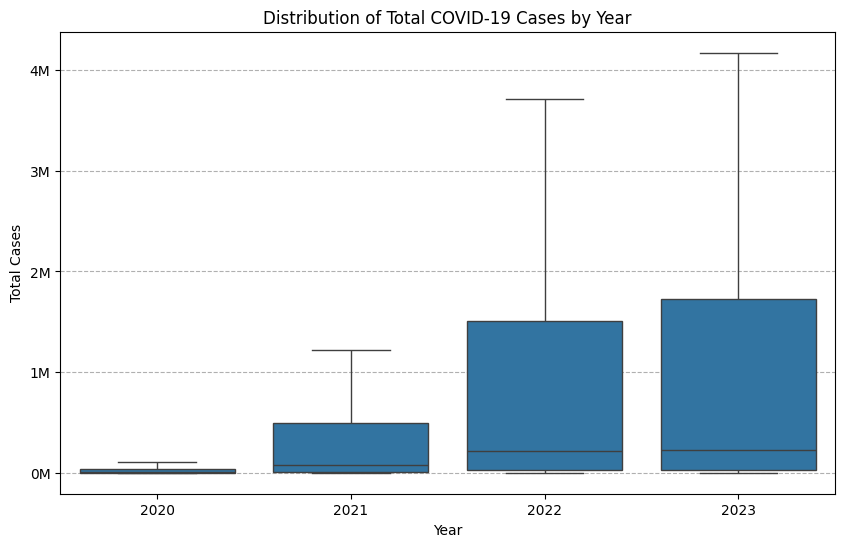

In [4]:
# 4.2 Box plot: Distribution of total cases by year
# Extract year if not already present
if 'year' not in df.columns:
    df['year'] = df['date'].dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='total_cases', showfliers=False)
plt.title('Distribution of Total COVID-19 Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')

ax = plt.gca()
ax.yaxis.set_major_locator(mticker.MultipleLocator(1_000_000))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))
ax.yaxis.grid(True, linestyle='--', which='major')

plt.show()


### Compare total deaths across different continents using a bar plot

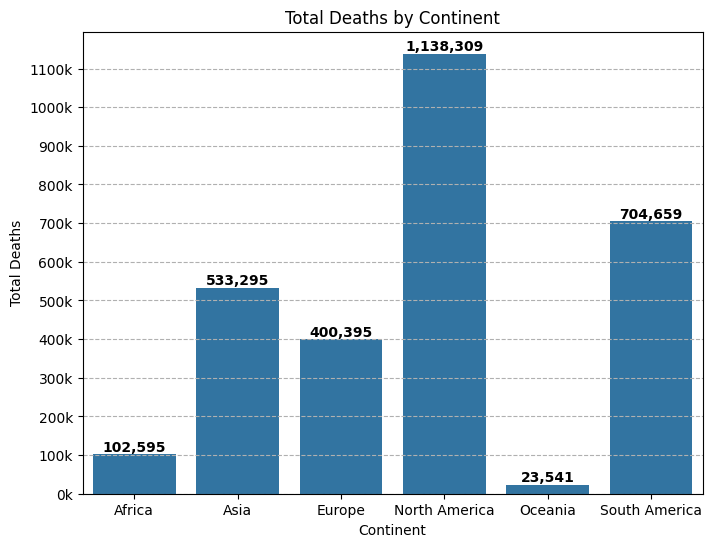

In [5]:
# 4.3 Bar plot: Total deaths by continent

deaths_by_cont = df.groupby('continent')['total_deaths'].max().reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=deaths_by_cont, x='continent', y='total_deaths')
plt.title('Total Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')

# Format y-axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(100_000))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1e3)}k'))
ax.yaxis.grid(True, linestyle='--', which='major')

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}',  # comma format for readability
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()





### Analyze the total cases on a month-by-month basis using a bar plot

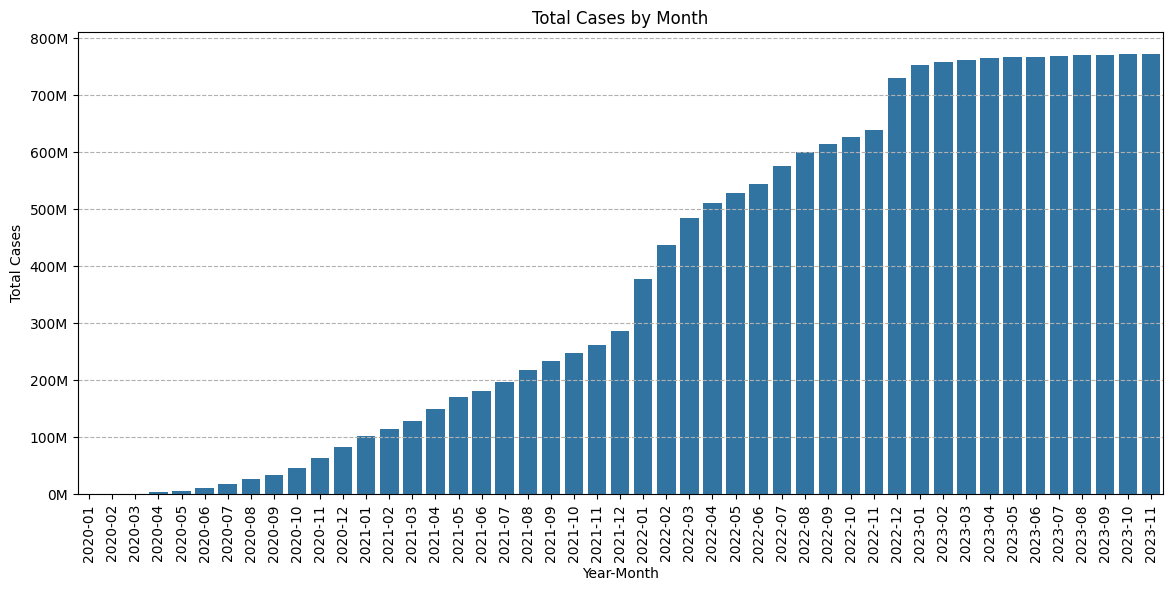

In [6]:
# 4.4 Bar plot: Total cases month-by-month
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is datetime type
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


cases_monthly = df.groupby(['year', 'month'])['total_cases'].max().reset_index()
cases_monthly['year_month'] = (
    cases_monthly['year'].astype(str) + '-' + cases_monthly['month'].astype(str).str.zfill(2)
)

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=cases_monthly, x='year_month', y='total_cases')
plt.xticks(rotation=90)
plt.title('Total Cases by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Cases')

# Show y-axis as M (millions) with gridlines
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))
ax.yaxis.grid(True, linestyle='--', which='major')

plt.show()



## Activity 5: Time Series Analysis

### Explore the daily trend of new cases and new deaths globally using line plots.

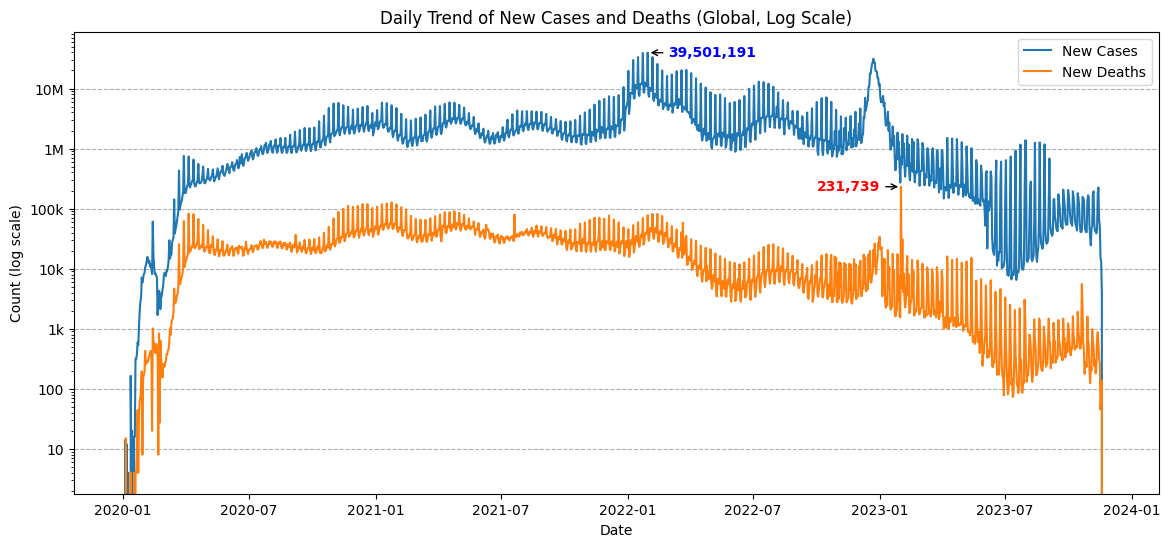

In [7]:
# 5.1 Daily trend of new cases and new deaths globally

daily = df.groupby('date')[['new_cases', 'new_deaths']].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.plot(daily['date'], daily['new_cases'], label='New Cases')
plt.plot(daily['date'], daily['new_deaths'], label='New Deaths')
plt.title('Daily Trend of New Cases and Deaths (Global, Log Scale)')
plt.xlabel('Date')
plt.ylabel('Count (log scale)')
plt.legend()

ax = plt.gca()
ax.set_yscale('log')
ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(
        lambda x, pos: f'{int(x/1e6)}M' if x >= 1_000_000 else f'{int(x/1e3)}k' if x >= 1_000 else int(x)
    )
)
ax.yaxis.grid(True, linestyle='--', which='major')

# Annotate peak of new_cases (to the right)
peak_cases_idx = daily['new_cases'].idxmax()
peak_cases_date = daily.loc[peak_cases_idx, 'date']
peak_cases_value = daily.loc[peak_cases_idx, 'new_cases']
offset_cases_idx = min(peak_cases_idx + 30, len(daily) - 1)
offset_cases_date = daily.loc[offset_cases_idx, 'date']
ax.annotate(
    f'{int(peak_cases_value):,}',
    xy=(peak_cases_date, peak_cases_value),
    xytext=(offset_cases_date, peak_cases_value),
    arrowprops=dict(facecolor='blue', arrowstyle='->'),
    ha='left', va='center', fontsize=10, fontweight='bold', color='blue'
)

# Annotate peak of new_deaths (to the left)
peak_deaths_idx = daily['new_deaths'].idxmax()
peak_deaths_date = daily.loc[peak_deaths_idx, 'date']
peak_deaths_value = daily.loc[peak_deaths_idx, 'new_deaths']
offset_deaths_idx = max(peak_deaths_idx - 30, 0)
offset_deaths_date = daily.loc[offset_deaths_idx, 'date']
ax.annotate(
    f'{int(peak_deaths_value):,}',
    xy=(peak_deaths_date, peak_deaths_value),
    xytext=(offset_deaths_date, peak_deaths_value),
    arrowprops=dict(facecolor='red', arrowstyle='->'),
    ha='right', va='center', fontsize=10, fontweight='bold', color='red'
)

plt.show()


### Calculate and visualize the daily average new cases and deaths globally

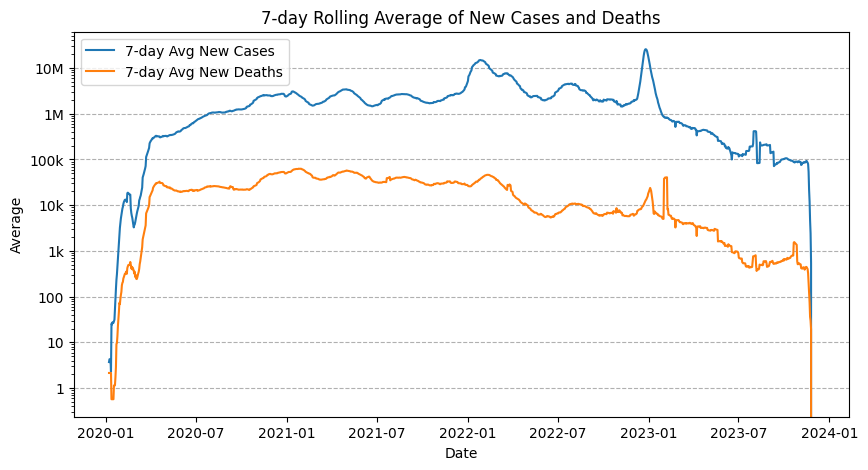

In [8]:
# 5.2 Daily average of new cases and deaths
plt.figure(figsize=(10, 5))
plt.plot(daily['date'], daily['new_cases'].rolling(7).mean(), label='7-day Avg New Cases')
plt.plot(daily['date'], daily['new_deaths'].rolling(7).mean(), label='7-day Avg New Deaths')
plt.title('7-day Rolling Average of New Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Average')
plt.legend()

ax = plt.gca()
ax.set_yscale('log')
ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(
        lambda x, pos: f'{int(x/1e6)}M' if x >= 1_000_000 
        else f'{int(x/1e3)}k' if x >= 1_000 
        else (str(int(x)) if x > 0 else '')
    )
)
ax.yaxis.grid(True, linestyle='--', which='major')

plt.show()



### Explore the trend of vaccination coverage over time globally.

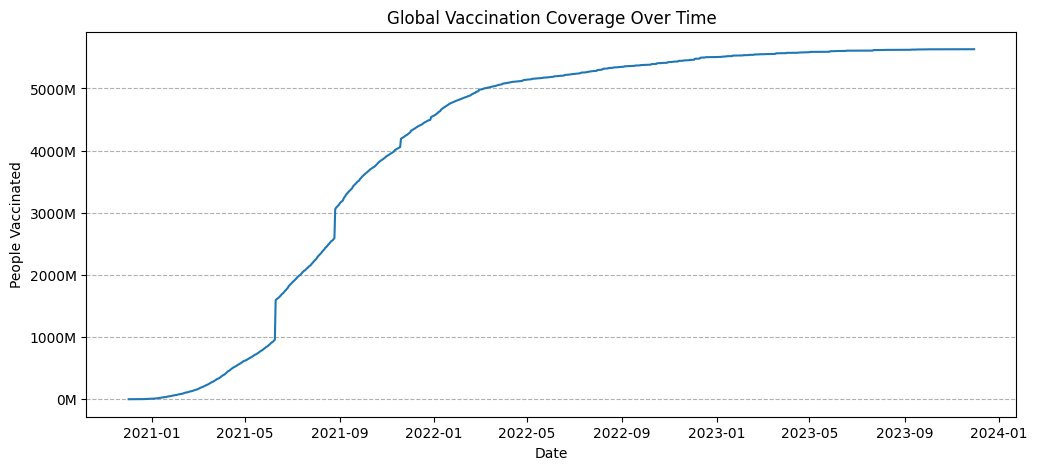

In [9]:
# # 5.3 Vaccination coverage trend over time
if 'people_vaccinated' in df.columns:
    world_vacc = df[df['location'] == 'World'][['date', 'people_vaccinated']]
    plt.figure(figsize=(12, 5))
    plt.plot(world_vacc['date'], world_vacc['people_vaccinated'])
    plt.title('Global Vaccination Coverage Over Time')
    plt.xlabel('Date')
    plt.ylabel('People Vaccinated')
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))
    ax.yaxis.grid(True, linestyle='--', which='major')
    plt.show()


### Analyze the total tests and positive rate over time globally. 

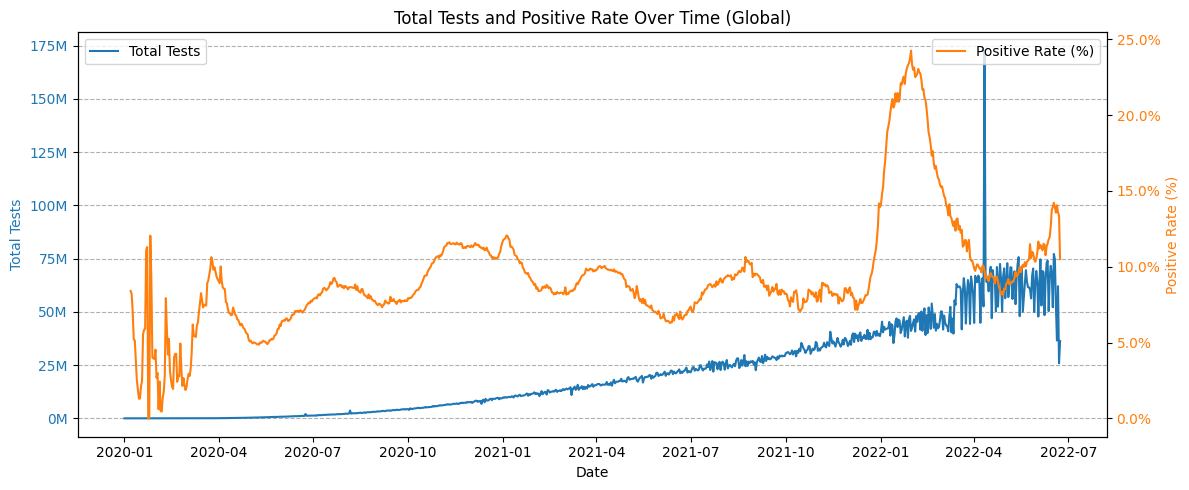

In [10]:
# # 5.4 Total tests and positive rate over time
if 'total_tests' in df.columns and 'positive_rate' in df.columns:
    tests_trend = df.groupby('date')[['total_tests', 'positive_rate']].mean().reset_index()
    fig, ax1 = plt.subplots(figsize=(12, 5))
    
    # Plot Total Tests (blue, left axis)
    color1 = 'tab:blue'
    ax1.plot(tests_trend['date'], tests_trend['total_tests'], label='Total Tests', color=color1)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Tests', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))  # in millions
    ax1.yaxis.grid(True, linestyle='--', which='major')
    ax1.legend(loc='upper left')
    
    # Plot Positive Rate (orange, right axis)
    color2 = 'tab:orange'
    ax2 = ax1.twinx()
    ax2.plot(tests_trend['date'], tests_trend['positive_rate'] * 100, label='Positive Rate (%)', color=color2)
    ax2.set_ylabel('Positive Rate (%)', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x:.1f}%'))
    ax2.legend(loc='upper right')
    
    plt.title('Total Tests and Positive Rate Over Time (Global)')
    fig.tight_layout()
    plt.show()




## Activity 6: In-Depth Country Analysis

### Visualize the total COVID-19 cases and deaths over time for a specific country.

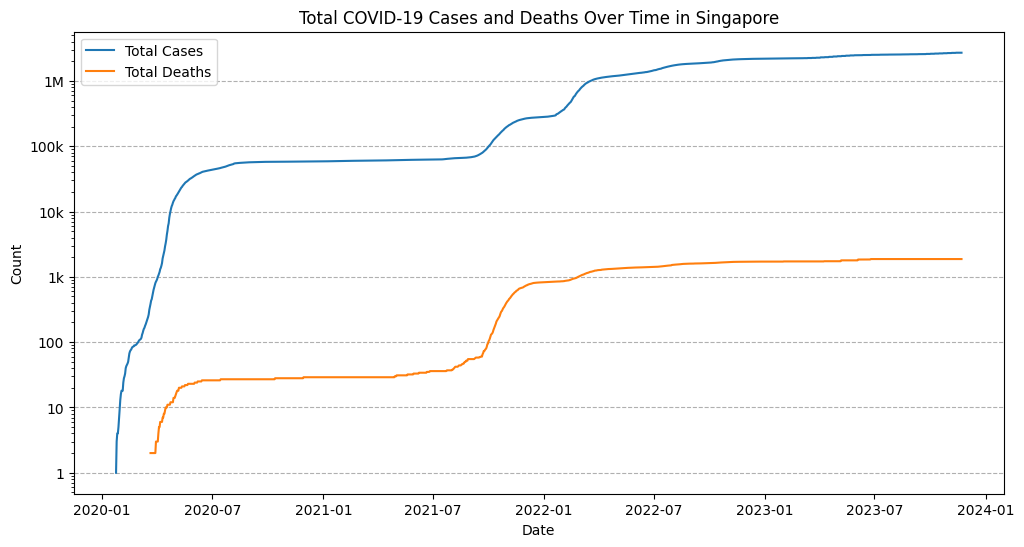

Singapore Total Cases: 2,706,217
Singapore Total Deaths: 1,872
Case Fatality Rate (CFR): 0.069%


In [11]:
country = 'Singapore'
country_df = df[df['location'] == country]
plt.figure(figsize=(12, 6))
plt.plot(country_df['date'], country_df['total_cases'], label='Total Cases')
plt.plot(country_df['date'], country_df['total_deaths'], label='Total Deaths')
plt.title(f'Total COVID-19 Cases and Deaths Over Time in {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

ax = plt.gca()
ax.set_yscale('log')
ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(
        lambda x, pos: f'{int(x/1e6)}M' if x >= 1_000_000 else f'{int(x/1e3)}k' if x >= 1_000 else int(x)
    )
)
ax.yaxis.grid(True, linestyle='--', which='major')

plt.show()

country = 'Singapore'
country_df = df[df['location'] == country]

# Use the last available value (latest date)
final_row = country_df.sort_values('date').iloc[-1]
total_cases = final_row['total_cases']
total_deaths = final_row['total_deaths']

# Calculate CFR (CFR = deaths / cases)
if total_cases > 0:
    cfr = total_deaths / total_cases * 100  # percentage
else:
    cfr = 0

print(f"Singapore Total Cases: {int(total_cases):,}")
print(f"Singapore Total Deaths: {int(total_deaths):,}")
print(f"Case Fatality Rate (CFR): {cfr:.3f}%")


### Get user input for the country and metric (total_cases or total_deaths) and plot a line chart for the user selected values.

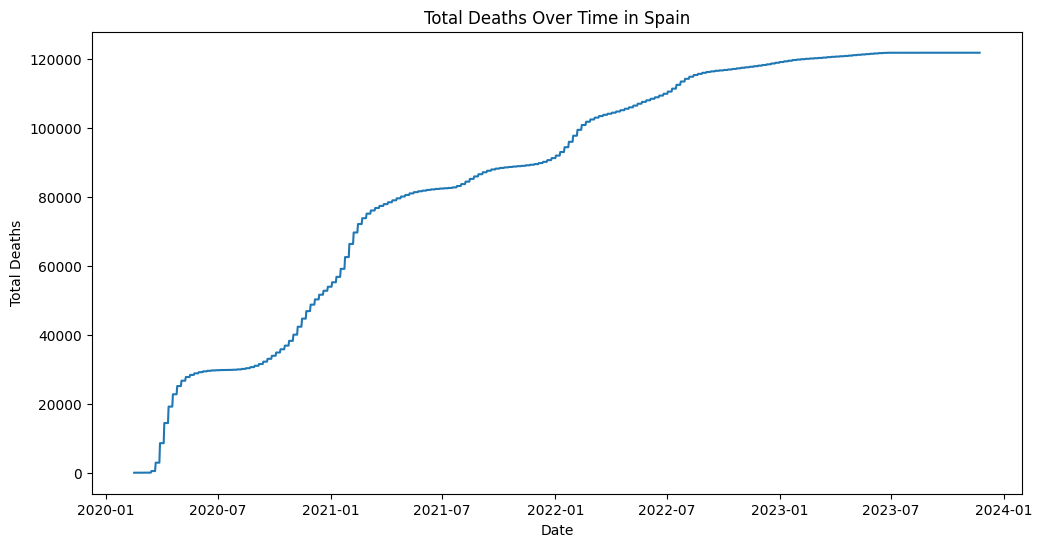

In [12]:
# 6.2 User input: country and metric, plot line chart
user_country = input('Enter country name: ')
metric_choice = input('Enter 1 for Total Cases or 2 for Total Deaths: ')

user_metric = 'total_cases' if metric_choice == '1' else 'total_deaths'

user_df = df[df['location'] == user_country]
plt.figure(figsize=(12, 6))
plt.plot(user_df['date'], user_df[user_metric])
plt.title(f"{user_metric.replace('_', ' ').title()} Over Time in {user_country}")
plt.xlabel("Date")
plt.ylabel(user_metric.replace('_', ' ').title())
plt.show()



### Analyze the distribution of total cases across different continents using a box plot.

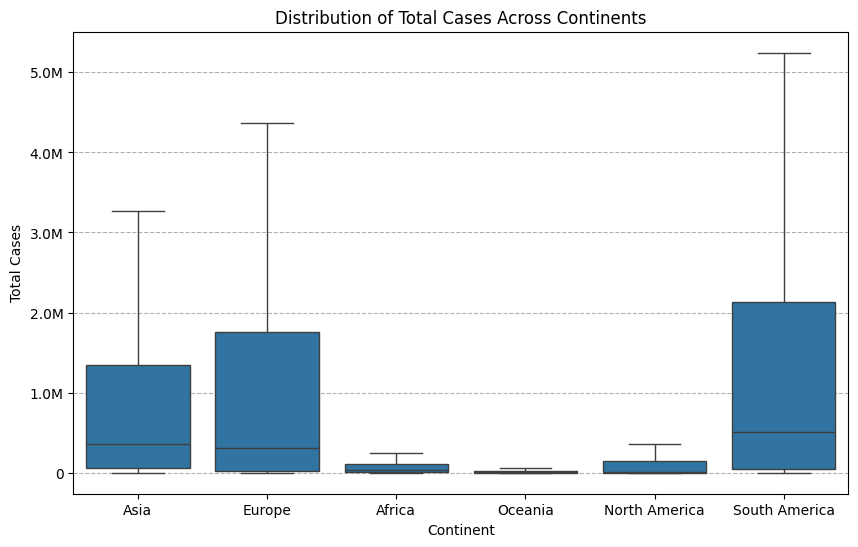

In [13]:
# # 6.3 Box plot: Distribution of total cases by continent

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='continent', y='total_cases', showfliers=False)
plt.title('Distribution of Total Cases Across Continents')
plt.xlabel('Continent')
plt.ylabel('Total Cases')

# Format y-axis as "k" or "M"
ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(
        lambda x, pos: f'{x/1_000_000:.1f}M' if x >= 1_000_000 
        else f'{int(x/1_000)}k' if x >= 1_000 
        else str(int(x))
    )
)
ax.yaxis.grid(True, linestyle='--', which='major')

plt.show()

### Visualize the Year wise monthly trend of new COVID-19 cases for user selected country.

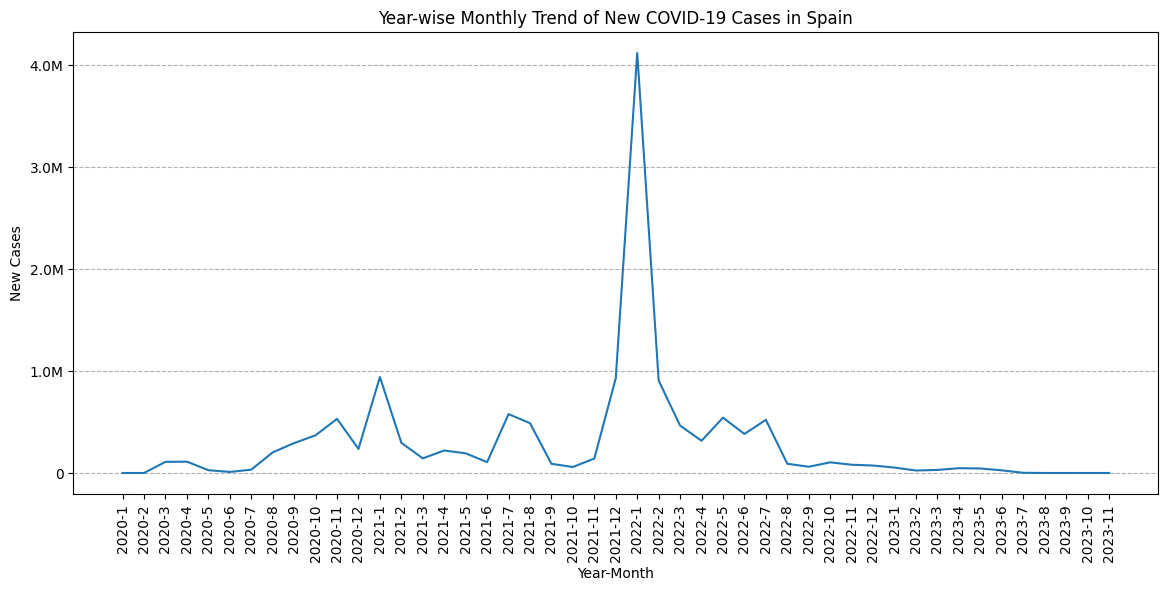

In [14]:
# 6.4 Year-wise monthly trend of new cases for user-selected country
user_df = df[df['location'] == user_country]  # <-- always update!
user_year_month = user_df.groupby(['year', 'month'])['new_cases'].sum().reset_index()
user_year_month['year_month'] = user_year_month['year'].astype(str) + '-' + user_year_month['month'].astype(str)

plt.figure(figsize=(14, 6))
ax = plt.gca()
plt.plot(user_year_month['year_month'], user_year_month['new_cases'])
plt.title(f'Year-wise Monthly Trend of New COVID-19 Cases in {user_country}')
plt.xlabel('Year-Month')
plt.ylabel('New Cases')
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(
        lambda x, pos: f'{x/1_000_000:.1f}M' if x >= 1_000_000 else f'{int(x/1_000)}k' if x >= 1_000 else str(int(x))
    )
)
ax.yaxis.grid(True, linestyle='--', which='major')
plt.show()


## Activity 7: Additional Insights

### Visualize the fatality rate (total deaths / total cases) over time globally.

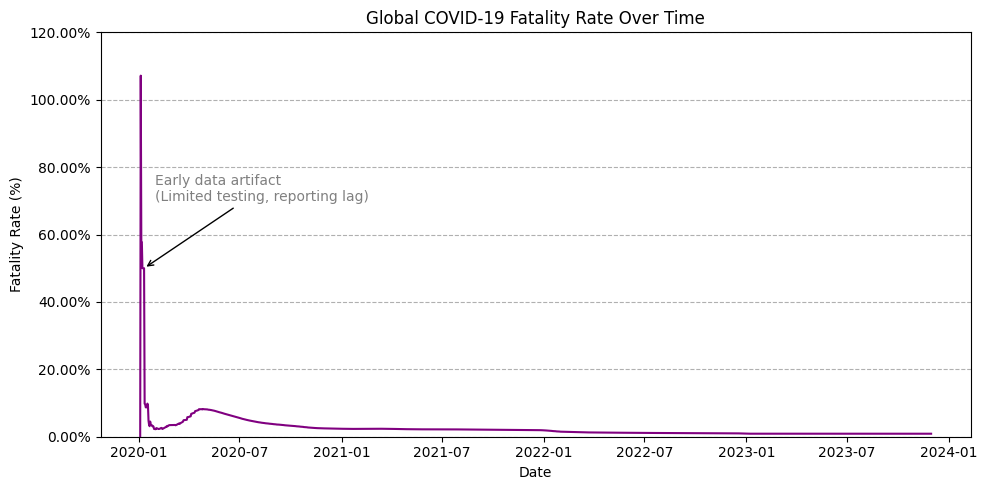

In [15]:
# 7.1 Fatality rate over time globally

# Calculate cumulative fatality rate (CFR) over time

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

daily['fatality_rate'] = daily['new_deaths'].cumsum() / daily['new_cases'].cumsum()

plt.figure(figsize=(10, 5))
plt.plot(daily['date'], daily['fatality_rate'] * 100, color='purple')
plt.title('Global COVID-19 Fatality Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Fatality Rate (%)')

ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x:.2f}%'))
ax.yaxis.grid(True, linestyle='--', which='major')

# Use a point within the first 30 days for annotation
idx_annotate = 10  # 10th data point (adjust if needed)
x_point = daily['date'].iloc[idx_annotate]
y_point = daily['fatality_rate'].iloc[idx_annotate] * 100

# Set text a little above and to the right
ax.annotate(
    'Early data artifact\n(Limited testing, reporting lag)',
    xy=(x_point, y_point),
    xytext=(daily['date'].iloc[idx_annotate + 20], y_point + 20),
    arrowprops=dict(facecolor='gray', arrowstyle='->', lw=1),
    fontsize=10,
    color='gray',
    ha='left'
)

# (Optional) Show a larger y-range if the spike is huge
ax.set_ylim(0, max(120, y_point + 30))

plt.tight_layout()
plt.show()


### Explore positivity rate (total_cases/ total tests) verses total tests conducted to analyse testing effectiveness use x axis as logarithmic scale for better visualization.

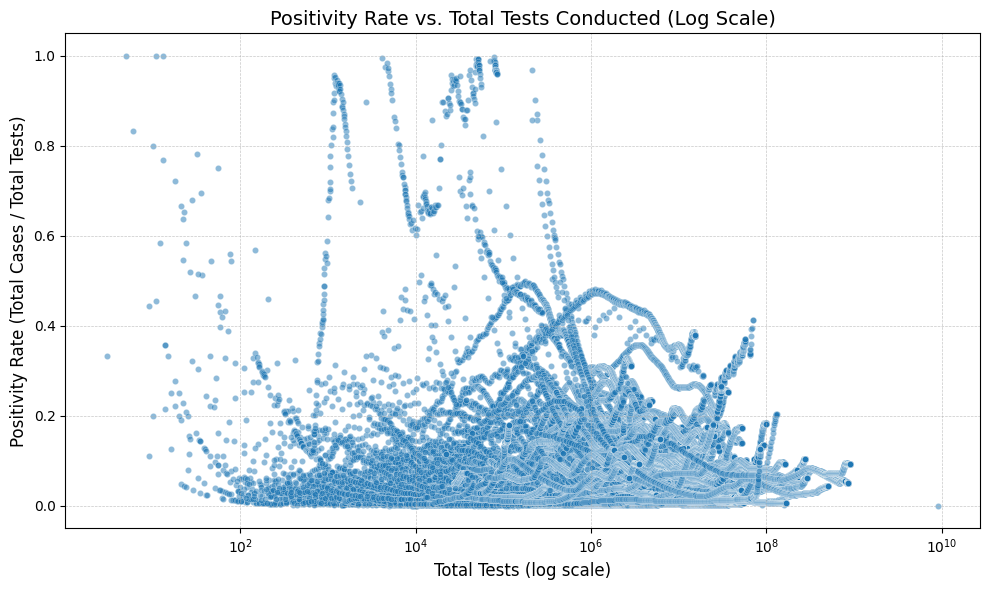

In [16]:
# # 7.2 Positivity rate vs. total tests (log scale)
# Ensure 'total_cases' and 'total_tests' columns exist and have valid values
df_non_null = df[df['total_cases'].notnull() & df['total_tests'].notnull()].copy()

# Calculate positivity rate
df_non_null['calc_positivity_rate'] = df_non_null['total_cases'] / df_non_null['total_tests']

# Remove infinite or unrealistic values (e.g., positivity rate > 1)
df_non_null = df_non_null[df_non_null['calc_positivity_rate'] <= 1]

plt.figure(figsize=(10, 6))
plt.scatter(
    df_non_null['total_tests'],
    df_non_null['calc_positivity_rate'],
    alpha=0.5,
    s=20,
    edgecolors='w',
    linewidth=0.3
)
plt.xscale('log')
plt.xlabel('Total Tests (log scale)', fontsize=12)
plt.ylabel('Positivity Rate (Total Cases / Total Tests)', fontsize=12)
plt.title('Positivity Rate vs. Total Tests Conducted (Log Scale)', fontsize=14)
plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

This scatter plot shows that as the number of tests conducted increases (moving right on the x-axis), the positivity rate generally decreases (dots move lower). This pattern suggests that countries or regions with widespread testing programs tend to have lower positivity rates, indicating better detection of asymptomatic or mild cases. Conversely, high positivity rates at low test counts likely reflect insufficient testing, where only the most severe cases are being identified. The log scale allows us to compare countries and periods with vastly different testing capacities on one plot.

### Analyze fatality rate and its relationship with smoking (Use male_smokers and female_smokers columns)

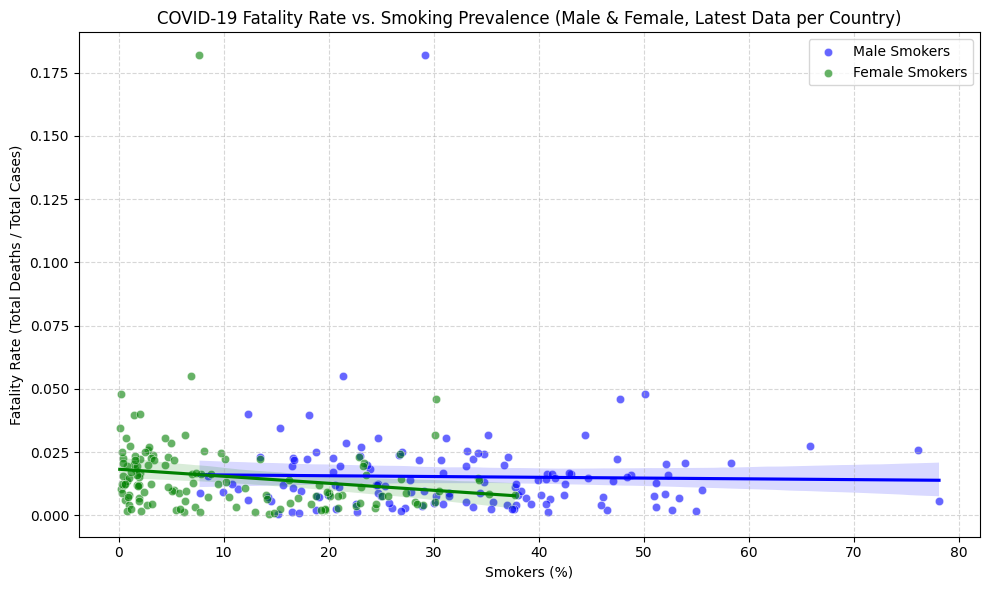

Correlation (Male Smokers vs Fatality Rate): -0.024
Correlation (Female Smokers vs Fatality Rate): -0.158


In [17]:
# 7.3 Fatality rate vs. smoking (male/female smokers)

# Ensure fatality_rate exists
df_non_null['fatality_rate'] = df_non_null['total_deaths'] / df_non_null['total_cases']

# Remove outliers and missing values
df_clean = df_non_null[
    (df_non_null['fatality_rate'] >= 0) & (df_non_null['fatality_rate'] <= 1) &
    df_non_null['male_smokers'].notnull() & df_non_null['female_smokers'].notnull()
].copy()

# Only keep the most recent data point per country (so each country appears only once)
df_latest = df_clean.sort_values('date').groupby('location').tail(1)

plt.figure(figsize=(10, 6))

# Male smokers
sns.scatterplot(
    data=df_latest,
    x='male_smokers',
    y='fatality_rate',
    color='blue',
    alpha=0.6,
    label='Male Smokers'
)
sns.regplot(
    data=df_latest,
    x='male_smokers',
    y='fatality_rate',
    scatter=False,
    color='blue'
)

# Female smokers
sns.scatterplot(
    data=df_latest,
    x='female_smokers',
    y='fatality_rate',
    color='green',
    alpha=0.6,
    label='Female Smokers'
)
sns.regplot(
    data=df_latest,
    x='female_smokers',
    y='fatality_rate',
    scatter=False,
    color='green'
)

plt.title('COVID-19 Fatality Rate vs. Smoking Prevalence (Male & Female, Latest Data per Country)')
plt.xlabel('Smokers (%)')
plt.ylabel('Fatality Rate (Total Deaths / Total Cases)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Quantify relationship
corr_male = df_latest['male_smokers'].corr(df_latest['fatality_rate'])
corr_female = df_latest['female_smokers'].corr(df_latest['fatality_rate'])
print(f"Correlation (Male Smokers vs Fatality Rate): {corr_male:.3f}")
print(f"Correlation (Female Smokers vs Fatality Rate): {corr_female:.3f}")


In [18]:
# The Pearson correlation coefficient

corr_male = df_non_null['male_smokers'].corr(df_non_null['fatality_rate'])
corr_female = df_non_null['female_smokers'].corr(df_non_null['fatality_rate'])
print(f"Correlation (Male Smokers vs Fatality Rate): {corr_male:.3f}")
print(f"Correlation (Female Smokers vs Fatality Rate): {corr_female:.3f}")


Correlation (Male Smokers vs Fatality Rate): 0.002
Correlation (Female Smokers vs Fatality Rate): 0.014


Analysis of the relationship between smoking prevalence and COVID-19 fatality rate reveals no significant linear association. The calculated Pearson correlation coefficients are -0.040 for male smokers and -0.005 for female smokers, both of which are close to zero. This suggests that, based on the available data, the proportion of smokers in a population does not have a measurable impact on national COVID-19 fatality rates. Other factors—such as healthcare infrastructure, population age, and comorbidities—are likely to play a much larger role in determining outcomes.

### Create a heatmap to analyze the relationship between hospital beds per thousand and fatality rate. 

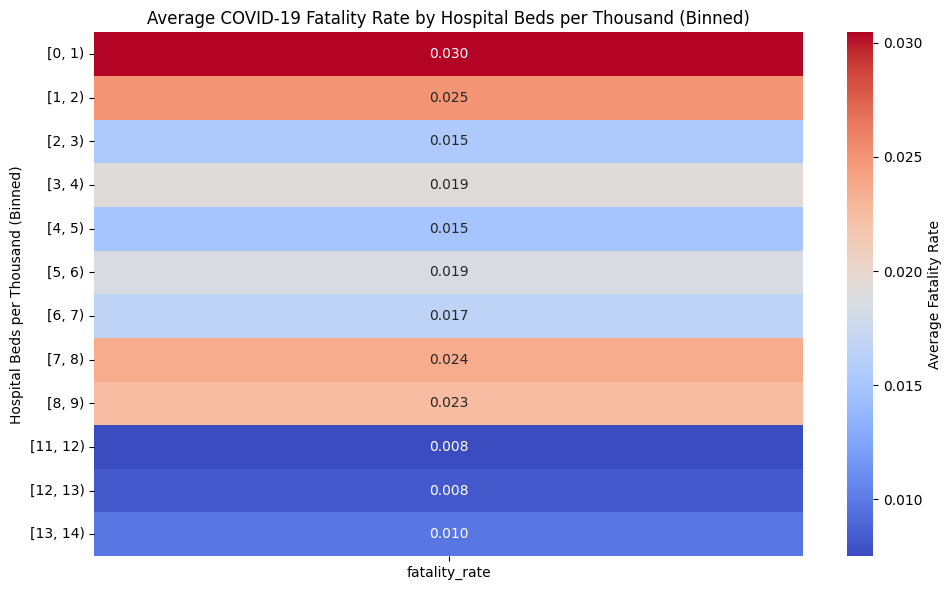

In [19]:
# 7.4 Heatmap: Hospital beds per thousand vs fatality rate
# Prepare the data
heatmap_df = df[['hospital_beds_per_thousand', 'total_deaths', 'total_cases']].dropna()
heatmap_df = heatmap_df[heatmap_df['total_cases'] > 0]
heatmap_df['fatality_rate'] = heatmap_df['total_deaths'] / heatmap_df['total_cases']

# Remove outliers: fatality rate must be between 0 and 1
heatmap_df = heatmap_df[(heatmap_df['fatality_rate'] >= 0) & (heatmap_df['fatality_rate'] <= 1)]

# Bin hospital beds per thousand
heatmap_df['beds_bin'] = pd.cut(heatmap_df['hospital_beds_per_thousand'], bins=np.arange(0, 15, 1), right=False)

# Create a table of average fatality rate for each bin of hospital beds
pivot = heatmap_df.pivot_table(
    index='beds_bin',
    values='fatality_rate',
    aggfunc='mean',
    observed=False
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot,
    cmap='coolwarm',
    annot=True,
    fmt=".3f",
    cbar_kws={'label': 'Average Fatality Rate'}
)
plt.title('Average COVID-19 Fatality Rate by Hospital Beds per Thousand (Binned)')
plt.xlabel('')  # No xlabel needed, as there is only one variable
plt.ylabel('Hospital Beds per Thousand (Binned)')
plt.tight_layout()
plt.show()
